<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the adults income dataset and print first five observations**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/PGDSE/EDA/LAB/IN_CLASS/DAY 1/adult_income.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  int64 
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
df1=df.copy()
df1_obj=df1.select_dtypes(include="object")
df1_num=df1.select_dtypes(exclude="object")

In [ ]:
df1_obj.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'native.country', 'income'],
      dtype='object')

In [ ]:
df1_num.columns

Index(['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [ ]:
df1_num['sex']=df1_num['sex'].astype("object")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['sex']=df1['sex'].astype("object")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
pd.pivot_table(data=df1,values='age',index='sex')

,age
sex,
0,39.433547
1,36.858230


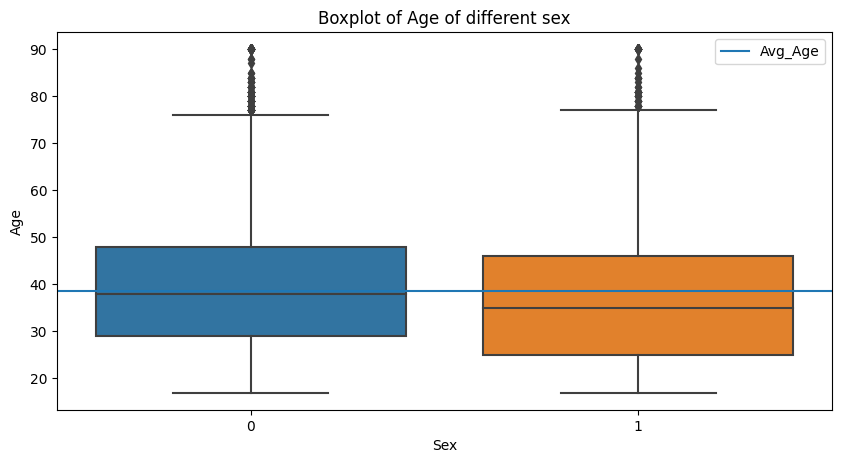

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x=df['sex'],y=df['age'])
plt.title("Boxplot of Age of different sex")
plt.axhline(y=df['age'].mean(),label="Avg_Age")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
print(f"The value under which 95% of the capital gain would lie is {df1['capital.gain'].quantile(0.95)}")

The value under which 95% of the capital gain would lie is 5013.0


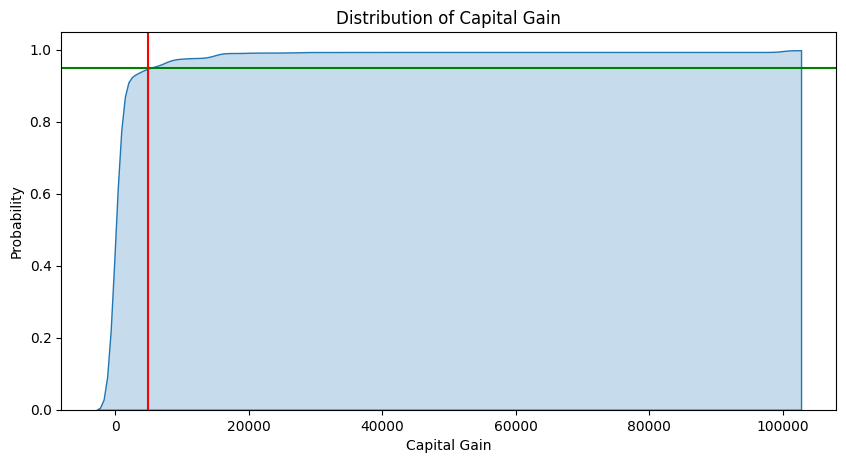

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(data=df1['capital.gain'],shade=True,cumulative=True)
plt.title("Distribution of Capital Gain")
plt.ylabel("Probability")
plt.xlabel("Capital Gain")
plt.axhline(y=0.95,color='green')
plt.axvline(x=df1['capital.gain'].quantile(0.95),color='red')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
t=df1['education'].value_counts()
t

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

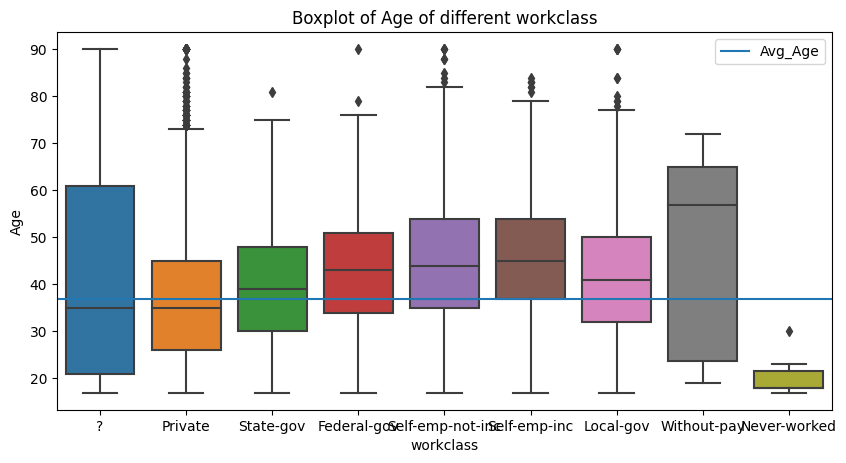

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x=df['workclass'],y=df['age'])
plt.title("Boxplot of Age of different workclass")
plt.axhline(y=df['age'].median(),label="Avg_Age")
plt.xlabel("workclass")
plt.ylabel("Age")
plt.legend()
plt.show()

In [ ]:
df1.pivot_table(values='age',columns='workclass',aggfunc='median')

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
age,35,43,41,18,35,45,44,39,57


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from scipy.stats import trim_mean
print(f"The\nMean={df1['capital.gain'].mean():0.2f}\nTrimmed Mean={trim_mean(df1['capital.gain'],proportiontocut = 0.01):0.2f}")

The
Mean=1077.65
Trimmed Mean=493.71


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
print(f"The percentage of Asian-Pac-Islander race are {df1[df1['race']=='Asian-Pac-Islander'].shape[0]/len(df1)*100:0.2f}%")

The percentage of Asian-Pac-Islander race are 3.19%


In [ ]:
print(f"The percentage of Asian-Pac-Islander race are {df1['race'].value_counts()[2]/len(df1)*100:0.2f}%")

The percentage of Asian-Pac-Islander race are 3.19%


<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
t=df1.pivot_table(index='occupation',values='hours.per.week',aggfunc='var')
t

,hours.per.week
occupation,
?,225.317543
Adm-clerical,91.964888
Armed-Forces,198.000000
Craft-repair,81.939394
Exec-managerial,123.412395
Farming-fishing,299.987814
Handlers-cleaners,111.946104
Machine-op-inspct,57.648955
Other-service,161.442544


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
iqr=df1['hours.per.week'].quantile(0.75)-df1['hours.per.week'].quantile(0.25)
print(f'The range of the middle 50% of working hours per week is {iqr:0.1f}')

The range of the middle 50% of working hours per week is 5.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1_num.var()
print(f'The different variability is \n {df1_num.var()} and \nbased on that {df1_num.var()[2]} should be removed as it is varing a lot')

The different variability is 
 age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
sex               2.213763e-01
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.527370e+02
dtype: float64 and 
based on that 6.618889907032666 should be removed as it is varing a lot


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
wh=df1.pivot_table(values='hours.per.week',index='workclass',aggfunc='std')/df1.pivot_table(values='hours.per.week',index='workclass',aggfunc='mean')*100
wh

,hours.per.week
workclass,
?,46.711116
Federal-gov,21.360037
Local-gov,26.283120
Never-worked,NaN
Private,27.954085
Self-emp-inc,28.473900
Self-emp-not-inc,37.537713
State-gov,29.968071
Without-pay,53.059084


<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
def cat_plot(variable):
    cat_col=df1.select_dtypes(include='object').columns
    if variable in cat_col:
        plot=sns.countplot(x=df1[variable])
        cat,val=(df1[variable].value_counts().keys()[0],df1[variable].value_counts()[0])
        xticks=[t.get_text() for t in plot.get_xticklabels()]
        plot.set_xticklabels(xticks,rotation=30)
        plt.title(f"count plot for '{variable}' variable")
        print(f"The highest frequency is {val} for '{cat}' category under the '{variable}' variable.")
    else:
        return ("The given variable is not categorical.")

The highest frequency is 21790 for '0' category under the 'sex' variable.


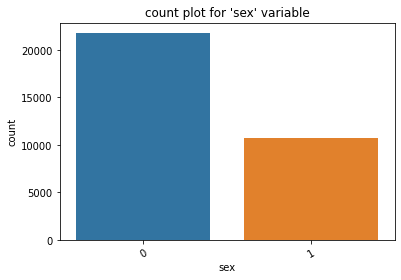

In [ ]:
cat_plot('sex')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

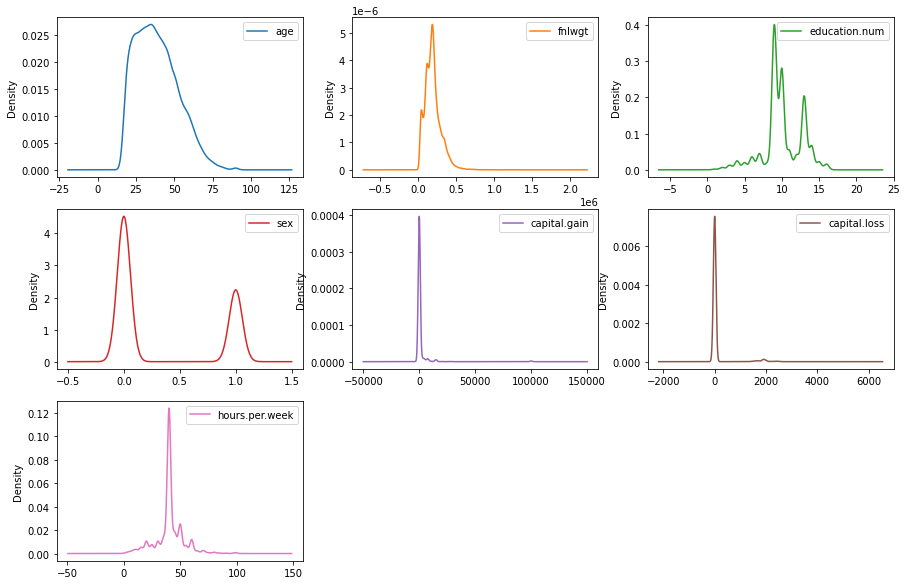

In [ ]:
df1_num.plot(kind='kde',subplots=True,layout=(3,3),sharex=False,figsize=(15,10))
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The working class distribution is 
Private             75.341666
Self-emp-not-inc     7.803814
Local-gov            6.427935
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: workclass, dtype: float64
 and 75.34 % of employee work in Private 


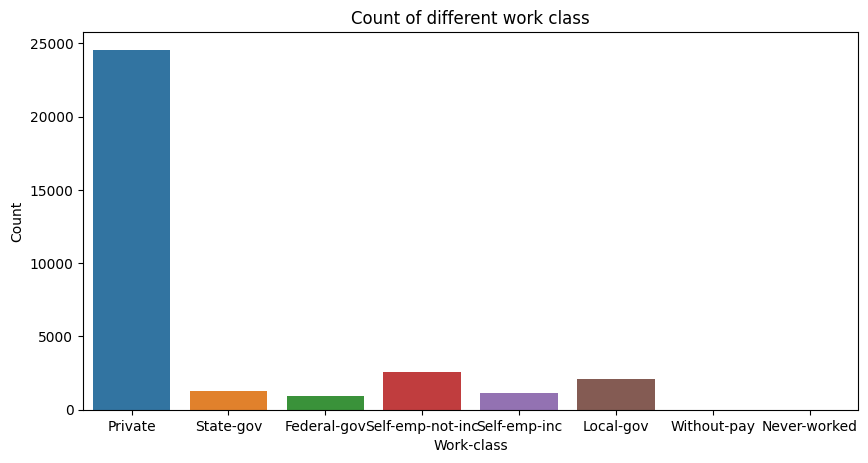

In [ ]:
df1['workclass'].replace(to_replace = '?',value= 'Private',inplace = True)
wc=df1['workclass'].value_counts()/len(df1)*100
print(f'The working class distribution is \n{wc}\n and {wc[0]:0.2f} % of employee work in Private ')
plt.figure(figsize = (10,5),dpi=100)
sns.countplot(x=df1['workclass'],data=df1)
plt.xlabel("Work-class")
plt.ylabel("Count")
plt.title("Count of different work class")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
max_hr=df1['hours.per.week'].value_counts()
print(f'The max people i.e. {max_hr.iloc[0]} are working {max_hr.index[0]} hrs/week')

The max people i.e. 15214 are working 40 hrs/week


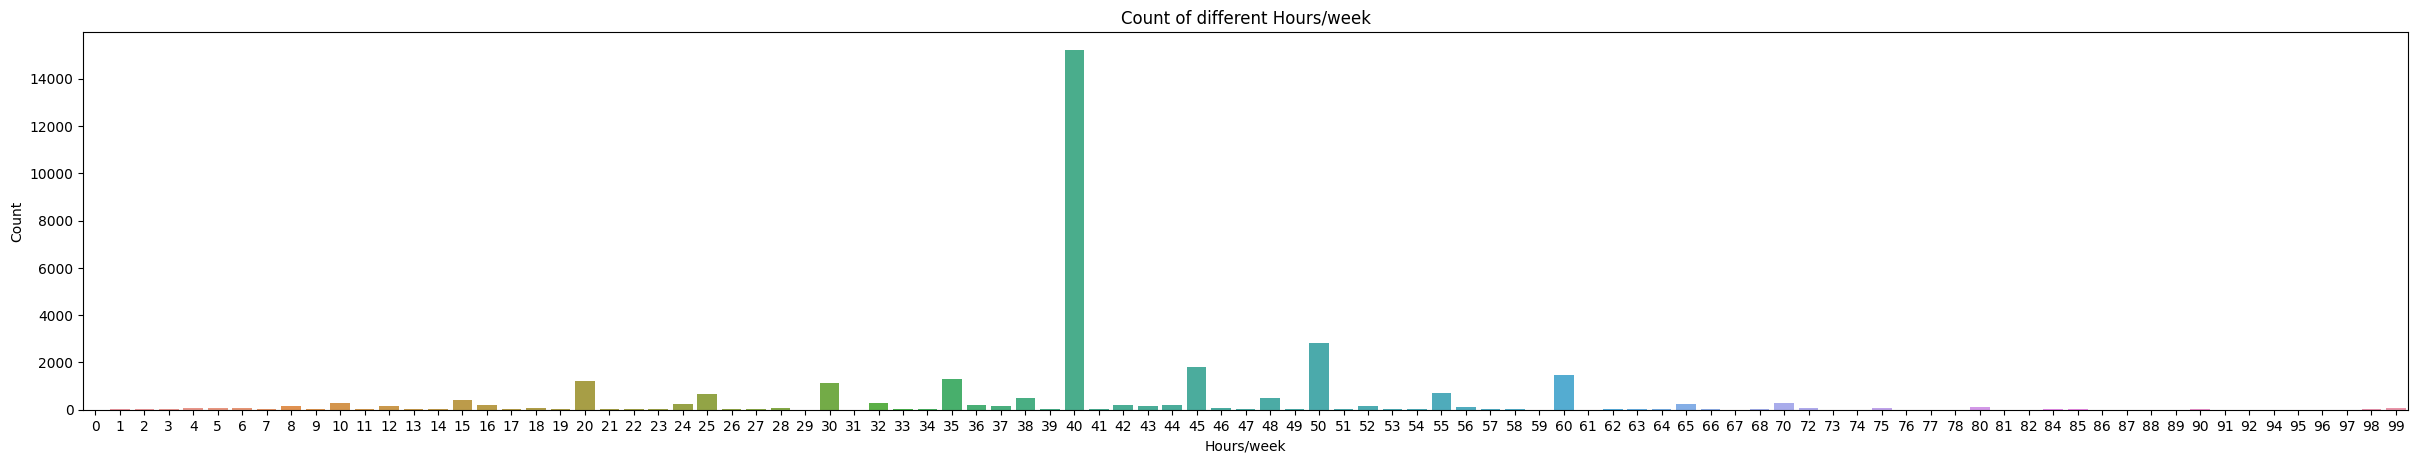

In [ ]:
plt.figure(figsize = (30,5),dpi=100)
sns.countplot(x=df1['hours.per.week'])
plt.xlabel("Hours/week")
plt.ylabel("Count")
plt.title("Count of different Hours/week")
plt.show()

<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1_num.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
sex                0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64

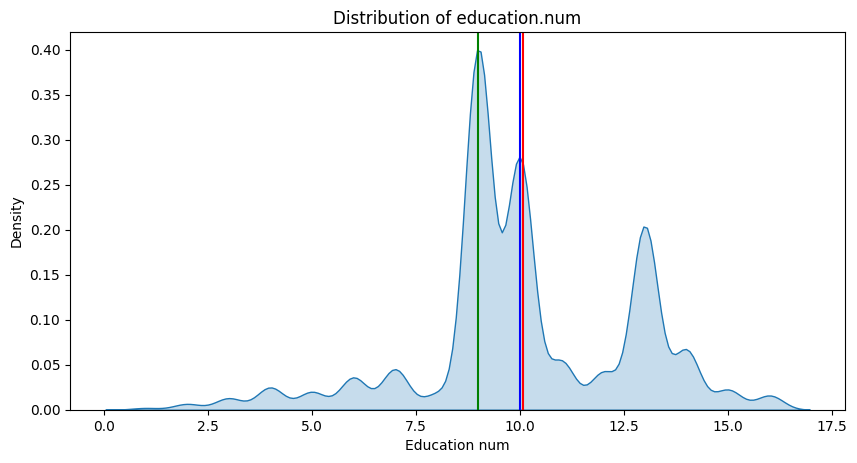

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(data=df1_num['education.num'],shade=True)
plt.axvline(df['education.num'].mean(),color='red',label='Sepal Length Mean')
plt.axvline(df['education.num'].median(),color='blue',label='Sepal Length Median')
plt.axvline(df['education.num'].value_counts().index[0],color='green',label='Sepal Length Mode')
plt.title("Distribution of education.num")
plt.ylabel("Density")
plt.xlabel("Education num")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1_num.kurt()

age                -0.166127
fnlwgt              6.218811
education.num       0.623444
sex                -1.482709
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916782
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

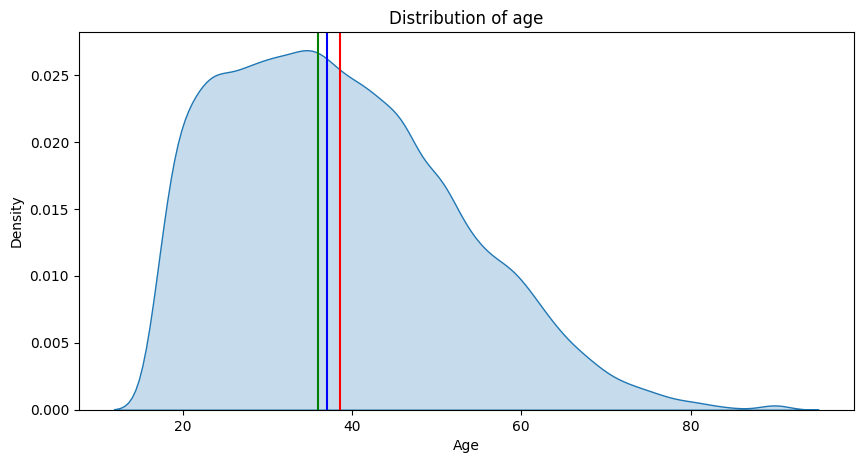

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(data=df1_num['age'],shade=True)
plt.axvline(df['age'].mean(),color='red',label='Sepal Length Mean')
plt.axvline(df['age'].median(),color='blue',label='Sepal Length Median')
plt.axvline(df['age'].value_counts().index[0],color='green',label='Sepal Length Mode')
plt.title("Distribution of age")
plt.ylabel("Density")
plt.xlabel("Age")
plt.show()

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

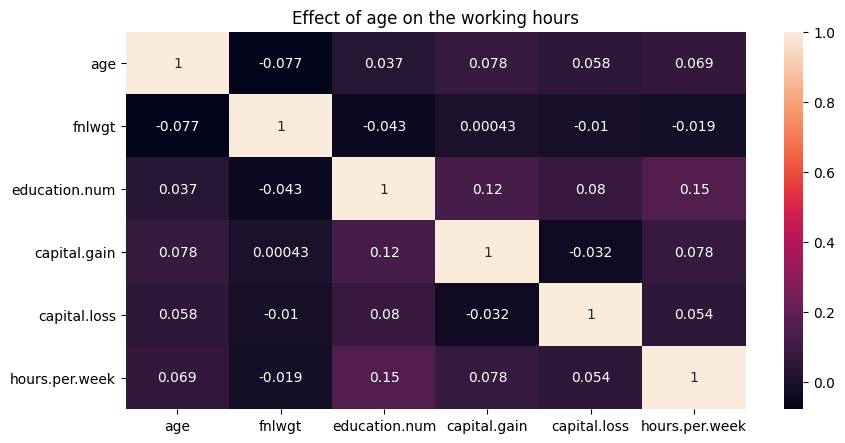

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(df1_num.corr(),annot=True)
plt.title("Effect of age on the working hours")
plt.show()

In [ ]:
df1_num[['age','hours.per.week']].corr()

,age,hours.per.week
age,1.000000,0.069311
hours.per.week,0.069311,1.000000


In [ ]:
print(f"Correlation between age and working hours is {df1_num['age'].corr(df1_num['hours.per.week'])*100:0.2f}%")

Correlation between age and working hours is 6.93%


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

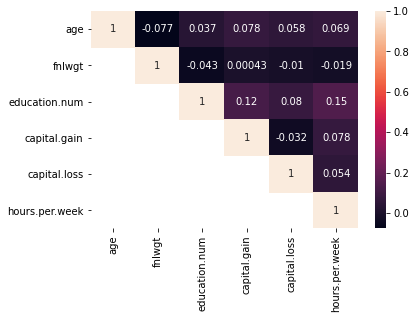

In [ ]:
mask = np.zeros_like(df1_num.corr())
mask[np.tril_indices_from(mask,k=-1)] = True
sns.heatmap(df1_num.corr(),annot=True,mask=mask)